### **Final Exam Part-B**

#### **CSCN8000-Artificial Intelligence Algorithms and Mathematics**

##### **Prepared by**
##### **Nikhil Shankar Chirakkal Sivasankaran** - 9026254

#### **Data Analysis & EDA**

- We have preprocessed images (28 x 28) converted into (,768) vector.
- The pixels are converted to grayscale ie it doesnt use RGB color channels.

##### **Train & Test Splits**

In [2]:
dataset_train_path = "../dataset/fashionmnist-datafiles/x_train.csv"
dataset_test_path = "../dataset/fashionmnist-datafiles/x_test.csv"
dataset_label_train_path = "../dataset/fashionmnist-datafiles/y_train.csv"
dataset_label_test_path = "../dataset/fashionmnist-datafiles/y_test.csv"

In [11]:
import pandas as pd
import numpy as np



print("*"*50)
print("TRAIN DATASET")
train_df = pd.read_csv(dataset_train_path)
display(train_df.head(5))
display(len(train_df))
print("*"*50)
print("UNIQUE TRAIN LABELS")
label_train_df = pd.read_csv(dataset_label_train_path)
display(label_train_df.iloc[:, 0].unique())
display(len(label_train_df))

print("*"*50)
print("TEST DATASET")
test_df = pd.read_csv(dataset_test_path)
display(test_df.head(5))
display(len(test_df))
print("*"*50)
print("UNIQUE TEST LABELS")
label_test_df = pd.read_csv(dataset_label_test_path)
display(label_test_df.iloc[:, 0].unique())
display(len(label_test_df))

**************************************************
TRAIN DATASET


,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,1,0,0,0,0,...,119,114,130,76,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,22,...,0,0,1,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,33,96,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


60000

**************************************************
UNIQUE TRAIN LABELS


array([4, 0, 2, 3, 1], dtype=int64)

60000

**************************************************
TEST DATASET


,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,2,3,0,3,174,189,67,0,0,0
2,0,0,0,0,0,0,0,0,1,0,...,164,58,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,21,...,1,0,0,0,0,0,0,0,0,0
4,0,0,0,2,0,1,1,0,0,0,...,71,12,0,0,0,0,0,0,0,0


10000

**************************************************
UNIQUE TEST LABELS


array([4, 2, 0, 1, 3], dtype=int64)

10000

- we confirmed the x_train and y_train are matching in numbers.
- same with test set 
- we know that there are 784 features for training.

### **Part-A: Model Training and Evaluation**

After going through the requirement the key points to note are ( Why this model was choosed? )
- We need a shallow classification model - This can be SVM, DecisionTrees or kNN. 
- Since we need to classify 5 classes 0-5 choosing linear SVM wont be possible.
- We can choose between kNN and DecisionTrees. 
- kNN will be expensive during inference due to the huge number of train dataset we have and also since it is an image choosing a model based on distance calculation will not be a good approach or we will need preprocess the data to make the kNN based model work better. Also finding the optimum K will also be a challenge.
- We also need to try and perform Ensembling techniques so Decision trees would work well with ensembling techniques. Due to these reasons I chose Decision trees as my initial model

#### **Decision Trees With no Ensembling** 

> Please note that the code for DecisionTree Training is inside ```DecisionTreeTrainer.py```

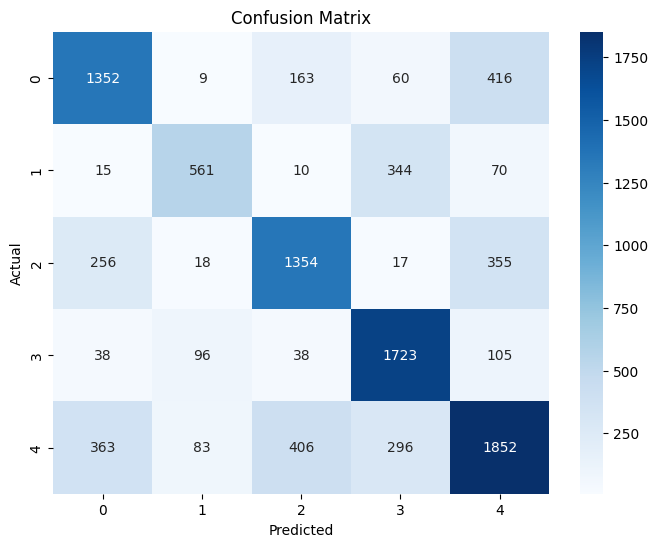

,Fold,Accuracy,Precision,Recall,F1-Score,Train Time (s),Validation Time (s)
0,1,0.660250,0.681986,0.644498,0.653027,NaN,NaN
1,2,0.646250,0.670159,0.659035,0.657748,NaN,NaN
2,3,0.607417,0.629366,0.587088,0.602091,NaN,NaN
3,4,0.611167,0.621594,0.596601,0.603512,NaN,NaN
4,5,0.621167,0.651751,0.615002,0.623277,NaN,NaN
5,Total,0.684200,0.690883,0.678567,0.680771,1.963562,0.018494


In [2]:
from DecisionTreeTrainer import DecisionTreeTrainer

#To make the decisionTree shallow we can make max depth 10 and make minimum sample per barnch to 50 and we allow all features to be considered
decisionTreeBaseModel = DecisionTreeTrainer(model_type="single", result_path="./decisiontree/single", max_depth=10, min_samples_split=50, max_features=1)
#Initially checking with 6000 datapoints to estimate how much time will it take for training. 
metrics_df = decisionTreeBaseModel.train(dataset_train_path, dataset_label_train_path, dataset_test_path, dataset_label_test_path, train_count=6000, test_count=1000)
display(metrics_df)

> Now checking with entire dataset of train and test

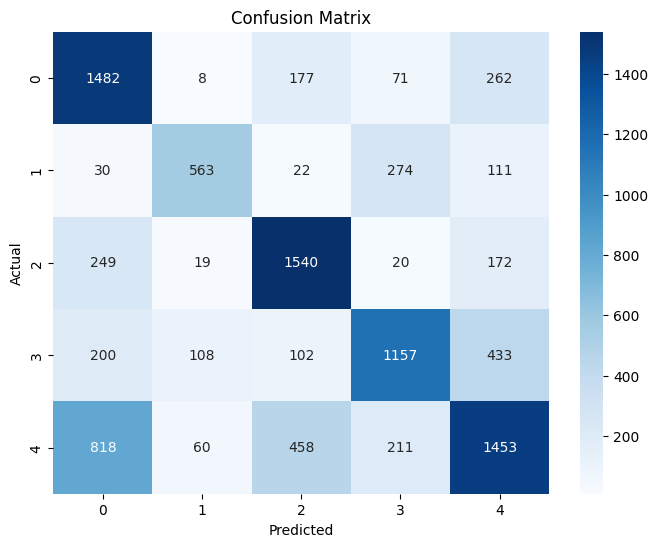

,Fold,Accuracy,Precision,Recall,F1-Score,Train Time (s),Validation Time (s)
0,1,0.669750,0.691093,0.660927,0.673131,NaN,NaN
1,2,0.622833,0.655685,0.611595,0.625365,NaN,NaN
2,3,0.679167,0.711999,0.651604,0.668768,NaN,NaN
3,4,0.665167,0.670015,0.661431,0.663091,NaN,NaN
4,5,0.688417,0.706835,0.697019,0.700598,NaN,NaN
5,Total,0.619500,0.642242,0.627367,0.626423,2.039226,0.020253


In [3]:
from DecisionTreeTrainer import DecisionTreeTrainer

#To make the decisionTree shallow we can make max depth 10 and make minimum sample per barnch to 50 and we allow all features to be considered
decisionTreeBaseModel = DecisionTreeTrainer(model_type="single", result_path="./decisiontree/single", max_depth=10, min_samples_split=50, max_features=1)
#Note that we removed train count and test count
metrics_df = decisionTreeBaseModel.train(dataset_train_path, dataset_label_train_path, dataset_test_path, dataset_label_test_path)
display(metrics_df)

##### **Results - Simple Decision Tree**

- Decision tree max_feature = All, min_sample_split=50, max_depth=10
- Trained 60000 Test 10000
- We can see we achieved more than 60% in accuracy, recall, precision and f1
- Training time is 2 seconds

##### **Adjusting max_depth to 3X**

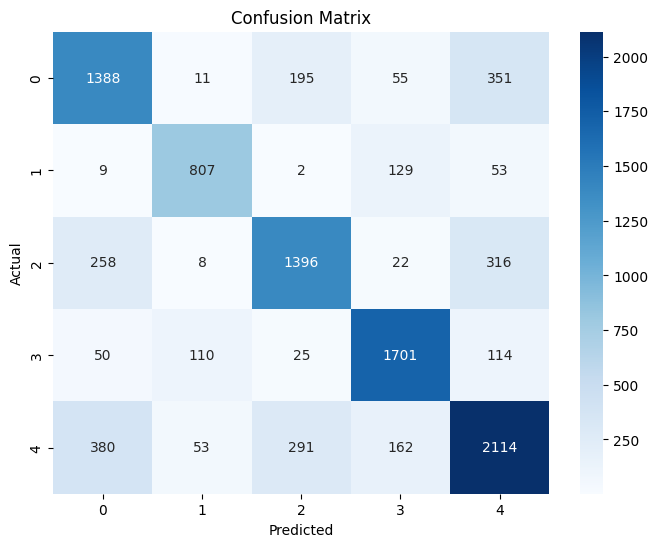

,Fold,Accuracy,Precision,Recall,F1-Score,Train Time (s),Validation Time (s)
0,1,0.740667,0.748411,0.744372,0.745879,NaN,NaN
1,2,0.740583,0.743572,0.742268,0.742882,NaN,NaN
2,3,0.719083,0.724626,0.722510,0.723420,NaN,NaN
3,4,0.748833,0.750905,0.743564,0.746930,NaN,NaN
4,5,0.755250,0.762808,0.758782,0.760700,NaN,NaN
5,Total,0.740600,0.750438,0.750833,0.750435,2.495144,0.024246


In [4]:
from DecisionTreeTrainer import DecisionTreeTrainer

#changed max_depth tp 3x from earlier model
decisionTreeBaseModel = DecisionTreeTrainer(model_type="single", result_path="./decisiontree/single", max_depth=30, min_samples_split=50, max_features=1)
#Note that we removed train count and test count
metrics_df = decisionTreeBaseModel.train(dataset_train_path, dataset_label_train_path, dataset_test_path, dataset_label_test_path)
display(metrics_df)

- We achieved a really good improvement from ~65 percentage accuracy and other metrics to a ~75% accuracy with just 0.5 seconds of training time increment. 
- This is a great result. Now before increasing further lets try with decreasing min_sample_split also.

##### **Adjust max_sample_split to half**

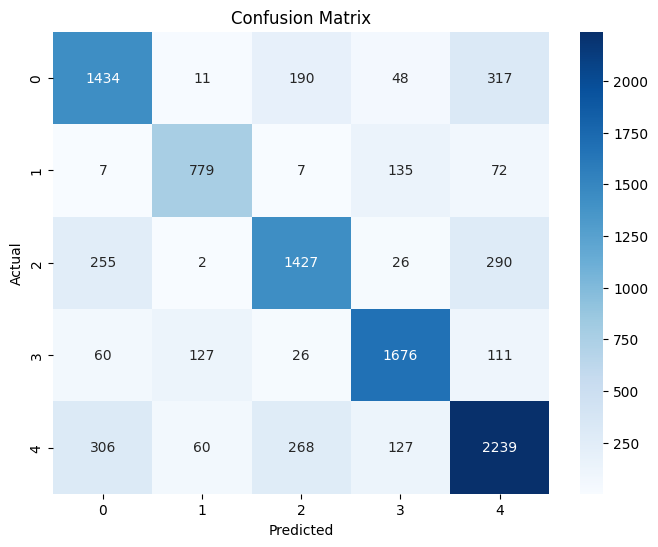

,Fold,Accuracy,Precision,Recall,F1-Score,Train Time (s),Validation Time (s)
0,1,0.749750,0.756527,0.750172,0.753116,NaN,NaN
1,2,0.761750,0.765755,0.765673,0.765609,NaN,NaN
2,3,0.734917,0.739230,0.739765,0.739145,NaN,NaN
3,4,0.761750,0.765043,0.764032,0.764509,NaN,NaN
4,5,0.750167,0.751813,0.753657,0.752687,NaN,NaN
5,Total,0.755500,0.761469,0.758767,0.759998,2.218822,0.02398


In [5]:
from DecisionTreeTrainer import DecisionTreeTrainer

#changed max_depth tp 3x from earlier model | Keeping max_depth same and decreasing sample split size to half 
decisionTreeBaseModel = DecisionTreeTrainer(model_type="single", result_path="./decisiontree/single", max_depth=30, min_samples_split=25, max_features=1)
#Note that we removed train count and test count
metrics_df = decisionTreeBaseModel.train(dataset_train_path, dataset_label_train_path, dataset_test_path, dataset_label_test_path)
display(metrics_df)

- We achieved a slight improvement. Though not significant.
- Training time reduced by 250 milliseconds. Again not a significant difference.
- We can try doubling the max_depth again.

##### **Max_depth to 60 from 30**

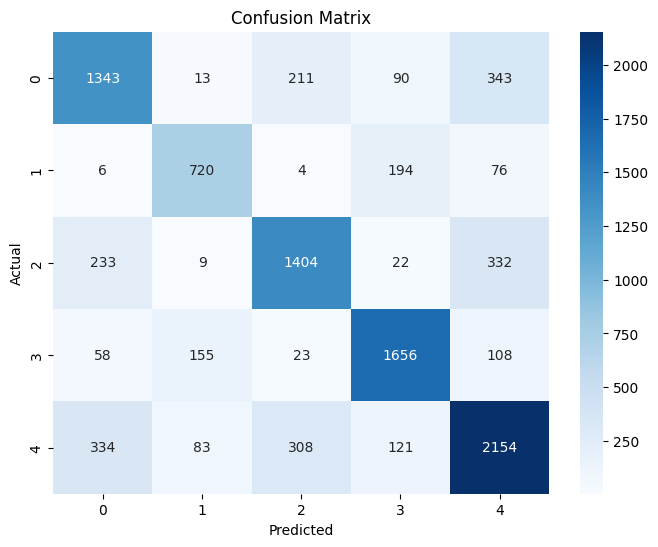

,Fold,Accuracy,Precision,Recall,F1-Score,Train Time (s),Validation Time (s)
0,1,0.750250,0.756851,0.753827,0.755202,NaN,NaN
1,2,0.744000,0.753439,0.750434,0.751874,NaN,NaN
2,3,0.757083,0.759450,0.760590,0.759831,NaN,NaN
3,4,0.753083,0.762818,0.757459,0.759914,NaN,NaN
4,5,0.743500,0.748546,0.745742,0.747101,NaN,NaN
5,Total,0.727700,0.728990,0.727900,0.728334,2.305419,0.021592


In [6]:
from DecisionTreeTrainer import DecisionTreeTrainer

#changed max_depth tp 2x from previous model | Keeping min_sample_split back to 50
decisionTreeBaseModel = DecisionTreeTrainer(model_type="single", result_path="./decisiontree/single", max_depth=60, min_samples_split=50, max_features=1)
#Note that we removed train count and test count
metrics_df = decisionTreeBaseModel.train(dataset_train_path, dataset_label_train_path, dataset_test_path, dataset_label_test_path)
display(metrics_df)

We can see that the model is exhibiting worse results means we overfitted with 60 as max_depth. So the optimum value is somewhere between 30 and 60. Lets try 45 next

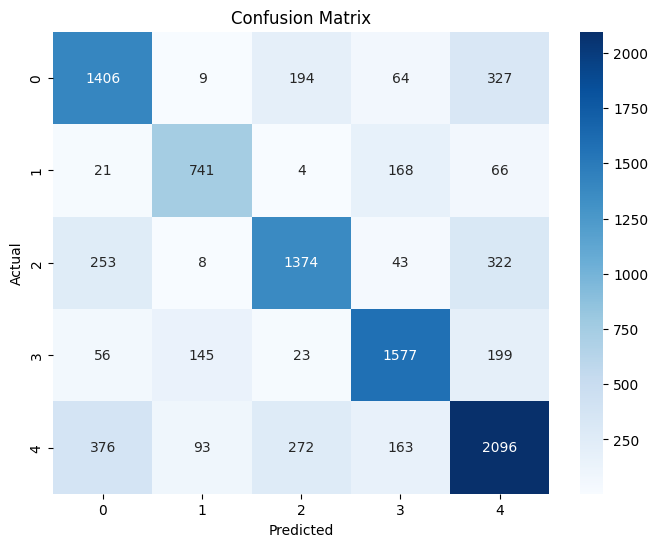

,Fold,Accuracy,Precision,Recall,F1-Score,Train Time (s),Validation Time (s)
0,1,0.746083,0.751884,0.751589,0.751730,NaN,NaN
1,2,0.747333,0.748069,0.744862,0.746346,NaN,NaN
2,3,0.742333,0.746974,0.745355,0.745856,NaN,NaN
3,4,0.753750,0.760797,0.753955,0.757180,NaN,NaN
4,5,0.748583,0.749916,0.749005,0.749453,NaN,NaN
5,Total,0.719400,0.724922,0.723633,0.724005,2.430513,0.021637


In [7]:
from DecisionTreeTrainer import DecisionTreeTrainer

#changed max_depth tp middle of 30 and 60 from previous model | Keeping min_sample_split back to 50
decisionTreeBaseModel = DecisionTreeTrainer(model_type="single", result_path="./decisiontree/single", max_depth=45, min_samples_split=50, max_features=1)
#Note that we removed train count and test count
metrics_df = decisionTreeBaseModel.train(dataset_train_path, dataset_label_train_path, dataset_test_path, dataset_label_test_path)
display(metrics_df)

##### **Changing to 38**

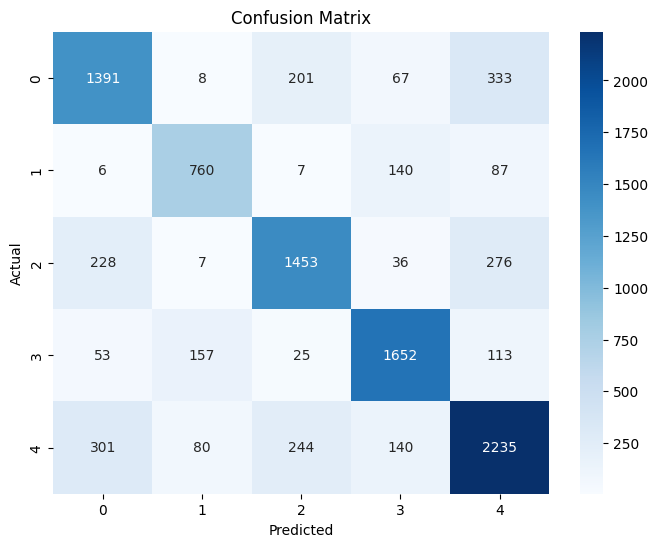

,Fold,Accuracy,Precision,Recall,F1-Score,Train Time (s),Validation Time (s)
0,1,0.738833,0.742574,0.737719,0.739894,NaN,NaN
1,2,0.740667,0.745447,0.744012,0.744716,NaN,NaN
2,3,0.748500,0.750326,0.745975,0.748029,NaN,NaN
3,4,0.758250,0.763830,0.762256,0.762994,NaN,NaN
4,5,0.744417,0.747528,0.744456,0.745848,NaN,NaN
5,Total,0.749100,0.750549,0.750600,0.750498,2.350938,0.021296


In [8]:
from DecisionTreeTrainer import DecisionTreeTrainer

#we are kind of doing a binary search from 30 to 60 to find the optimum
decisionTreeBaseModel = DecisionTreeTrainer(model_type="single", result_path="./decisiontree/single", max_depth=38, min_samples_split=50, max_features=1)
#Note that we removed train count and test count
metrics_df = decisionTreeBaseModel.train(dataset_train_path, dataset_label_train_path, dataset_test_path, dataset_label_test_path)
display(metrics_df)

> We made an important mistake. It could be that the optimum is also between 10 and 30 and we saw an already overfit result from 30. So lets try 20.

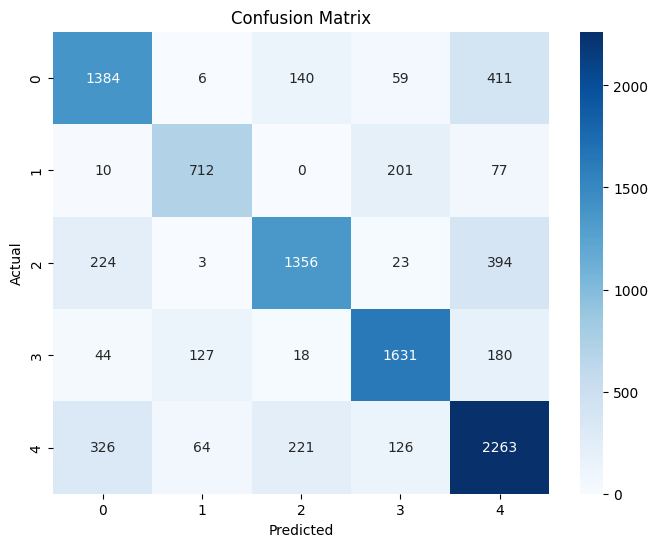

,Fold,Accuracy,Precision,Recall,F1-Score,Train Time (s),Validation Time (s)
0,1,0.733917,0.745843,0.734875,0.739875,NaN,NaN
1,2,0.725083,0.729531,0.719952,0.724029,NaN,NaN
2,3,0.719917,0.722449,0.721736,0.721848,NaN,NaN
3,4,0.736083,0.748132,0.733587,0.739553,NaN,NaN
4,5,0.735083,0.739545,0.733643,0.736311,NaN,NaN
5,Total,0.734600,0.747709,0.730367,0.737591,2.320285,0.020252


In [9]:
from DecisionTreeTrainer import DecisionTreeTrainer

#we are kind of doing a binary search from 10 to 38 to find the optimum
decisionTreeBaseModel = DecisionTreeTrainer(model_type="single", result_path="./decisiontree/single", max_depth=20, min_samples_split=50, max_features=1)
#Note that we removed train count and test count
metrics_df = decisionTreeBaseModel.train(dataset_train_path, dataset_label_train_path, dataset_test_path, dataset_label_test_path)
display(metrics_df)

##### **Trying with 25**

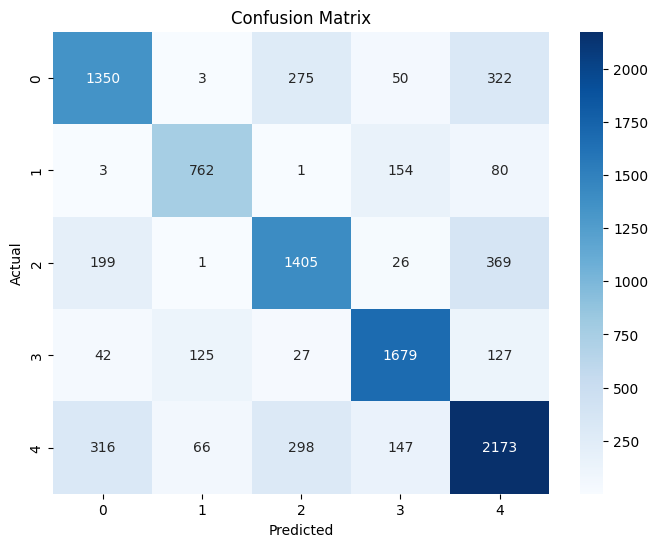

,Fold,Accuracy,Precision,Recall,F1-Score,Train Time (s),Validation Time (s)
0,1,0.73800,0.741761,0.743054,0.742215,NaN,NaN
1,2,0.77000,0.776332,0.769917,0.772760,NaN,NaN
2,3,0.75350,0.754131,0.755843,0.754846,NaN,NaN
3,4,0.74275,0.749519,0.744936,0.746954,NaN,NaN
4,5,0.74100,0.746624,0.742247,0.744271,NaN,NaN
5,Total,0.73690,0.745533,0.740667,0.742900,2.231392,0.021926


In [11]:
from DecisionTreeTrainer import DecisionTreeTrainer

#we are kind of doing a binary search from 10 to 38 to find the optimum
decisionTreeBaseModel = DecisionTreeTrainer(model_type="single", result_path="./decisiontree/single", max_depth=25, min_samples_split=50, max_features=1)
#Note that we removed train count and test count
metrics_df = decisionTreeBaseModel.train(dataset_train_path, dataset_label_train_path, dataset_test_path, dataset_label_test_path)
display(metrics_df)

##### **Trying with 25**

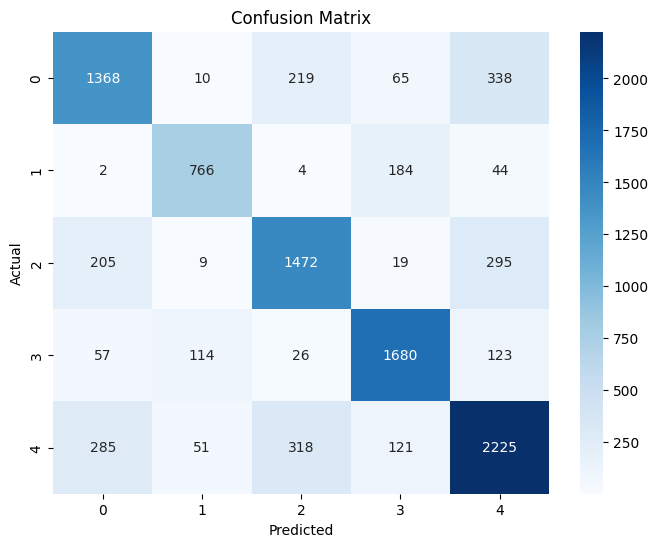

,Fold,Accuracy,Precision,Recall,F1-Score,Train Time (s),Validation Time (s)
0,1,0.745083,0.754533,0.748798,0.751409,NaN,NaN
1,2,0.752083,0.757302,0.755699,0.756418,NaN,NaN
2,3,0.737750,0.738504,0.741300,0.739758,NaN,NaN
3,4,0.735000,0.739499,0.736170,0.737711,NaN,NaN
4,5,0.734250,0.737100,0.737078,0.737041,NaN,NaN
5,Total,0.751100,0.757875,0.753533,0.755475,2.204076,0.021149


In [27]:
from DecisionTreeTrainer import DecisionTreeTrainer

#we are kind of doing a binary search from 10 to 38 to find the optimum
decisionTreeBaseModel = DecisionTreeTrainer(model_type="single", result_path="./decisiontree/single", max_depth=25, min_samples_split=50, max_features=1)
#Note that we removed train count and test count
metrics_df = decisionTreeBaseModel.train(dataset_train_path, dataset_label_train_path, dataset_test_path, dataset_label_test_path)
display(metrics_df)

We can select 25 as the selected depth based on Occhams razor principle of keeping things simple if the gain is not substantial.

#### **Ensembling - Bagging**

- We are choosing max_depth as 25 min_split as 50 and we are not restricting the model about feature selection at each stage. 
- Number of estimators we are keeping as 10 initially. We will experiment with more as we move forward.

c:\Users\DELL\Desktop\Conestoga\AIML\FoundationsMachineLearningFramework\Lab\venvs\CSCN8010_classical_ml_311\Lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
c:\Users\DELL\Desktop\Conestoga\AIML\FoundationsMachineLearningFramework\Lab\venvs\CSCN8010_classical_ml_311\Lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
c:\Users\DELL\Desktop\Conestoga\AIML\FoundationsMachineLearningFramework\Lab\venvs\CSCN8010_classical_ml_311\Lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
c:\Users\DELL\Desktop\Conestoga\AIML\FoundationsMachineLearningFramework\Lab\venvs\CSCN8010_classical_ml_311\Lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarni

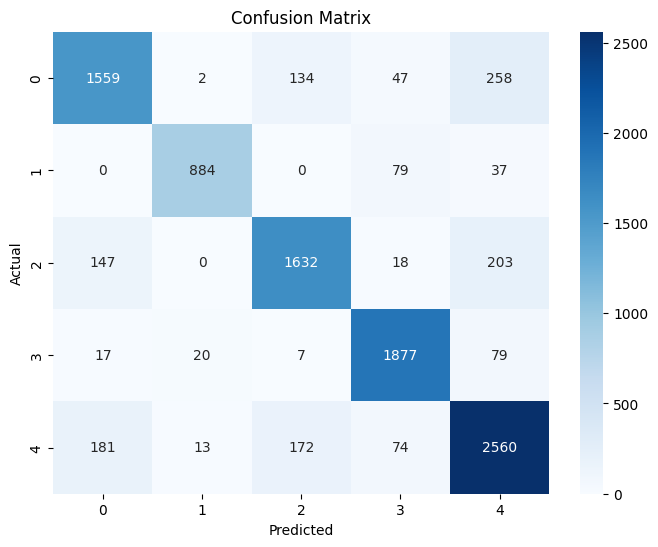

,Fold,Accuracy,Precision,Recall,F1-Score,Train Time (s),Validation Time (s)
0,1,0.850167,0.865573,0.851407,0.857705,NaN,NaN
1,2,0.856000,0.869220,0.853620,0.860502,NaN,NaN
2,3,0.858750,0.873969,0.859824,0.866266,NaN,NaN
3,4,0.860167,0.874506,0.859159,0.865936,NaN,NaN
4,5,0.857667,0.871291,0.856592,0.863016,NaN,NaN
5,Total,0.851200,0.866360,0.854267,0.859674,12.401815,0.397898


In [3]:
from DecisionTreeTrainer import DecisionTreeTrainer

decisionTreeBaseModel = DecisionTreeTrainer(model_type="bagging", result_path="./decisiontree/ensemble-bagging", max_depth=25, min_samples_split=50, max_features=1, estimators=10)
#Note that we removed train count and test count
metrics_df = decisionTreeBaseModel.train(dataset_train_path, dataset_label_train_path, dataset_test_path, dataset_label_test_path)
display(metrics_df)

- We achieved really good improvement using ensembling based on bagging method.
- The achieved 10% improvement with 10 estimators only.
- The training time increased by ~6x-7x from simple decision tree with no ensembling.

##### **Increasing estimator size from 10 to 50**

c:\Users\DELL\Desktop\Conestoga\AIML\FoundationsMachineLearningFramework\Lab\venvs\CSCN8010_classical_ml_311\Lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
c:\Users\DELL\Desktop\Conestoga\AIML\FoundationsMachineLearningFramework\Lab\venvs\CSCN8010_classical_ml_311\Lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
c:\Users\DELL\Desktop\Conestoga\AIML\FoundationsMachineLearningFramework\Lab\venvs\CSCN8010_classical_ml_311\Lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
c:\Users\DELL\Desktop\Conestoga\AIML\FoundationsMachineLearningFramework\Lab\venvs\CSCN8010_classical_ml_311\Lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarni

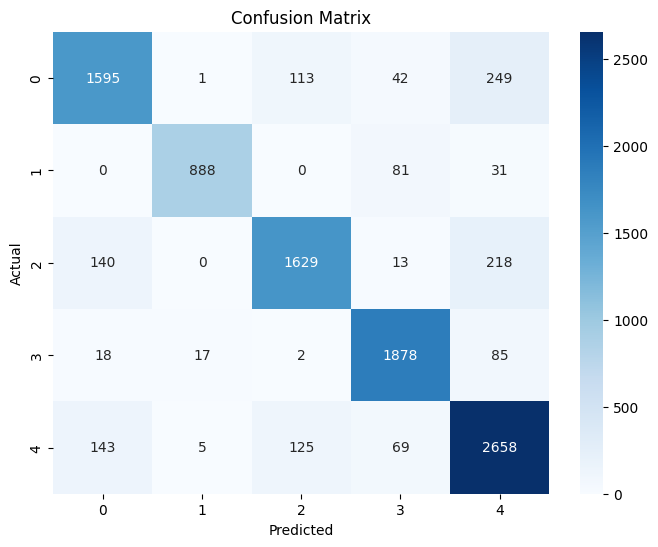

,Fold,Accuracy,Precision,Recall,F1-Score,Train Time (s),Validation Time (s)
0,1,0.870750,0.887787,0.872184,0.879078,NaN,NaN
1,2,0.874417,0.888875,0.874990,0.881252,NaN,NaN
2,3,0.871417,0.887188,0.872453,0.879061,NaN,NaN
3,4,0.876833,0.891956,0.875820,0.882833,NaN,NaN
4,5,0.869417,0.884302,0.867987,0.875024,NaN,NaN
5,Total,0.864800,0.881858,0.865000,0.872384,60.07472,2.038196


In [4]:
from DecisionTreeTrainer import DecisionTreeTrainer

#Number of estimators to 50
decisionTreeBaseModel = DecisionTreeTrainer(model_type="bagging", result_path="./decisiontree/ensemble-bagging", max_depth=25, min_samples_split=50, max_features=1, estimators=50)
#Note that we removed train count and test count
metrics_df = decisionTreeBaseModel.train(dataset_train_path, dataset_label_train_path, dataset_test_path, dataset_label_test_path)
display(metrics_df)

We achived ~2% improvement with around 5x increase in training time. Now lets try with 100.

##### **100 Estimators**

c:\Users\DELL\Desktop\Conestoga\AIML\FoundationsMachineLearningFramework\Lab\venvs\CSCN8010_classical_ml_311\Lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
c:\Users\DELL\Desktop\Conestoga\AIML\FoundationsMachineLearningFramework\Lab\venvs\CSCN8010_classical_ml_311\Lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
c:\Users\DELL\Desktop\Conestoga\AIML\FoundationsMachineLearningFramework\Lab\venvs\CSCN8010_classical_ml_311\Lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
c:\Users\DELL\Desktop\Conestoga\AIML\FoundationsMachineLearningFramework\Lab\venvs\CSCN8010_classical_ml_311\Lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarni

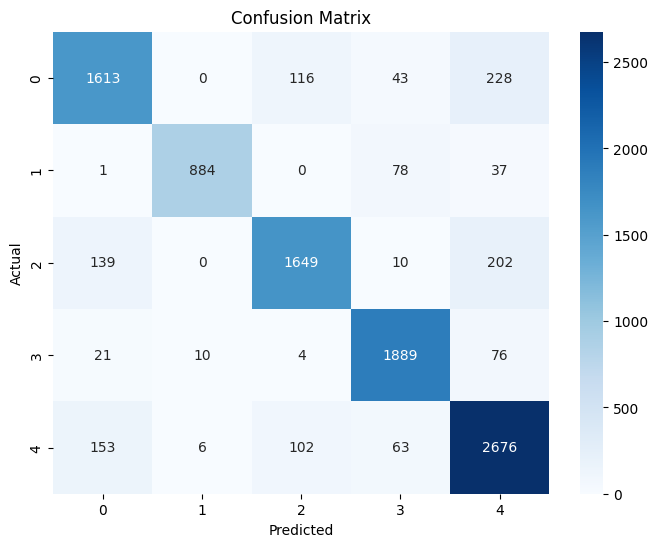

,Fold,Accuracy,Precision,Recall,F1-Score,Train Time (s),Validation Time (s)
0,1,0.867833,0.885407,0.868501,0.875974,NaN,NaN
1,2,0.873083,0.888403,0.872892,0.879821,NaN,NaN
2,3,0.868667,0.885531,0.869692,0.876709,NaN,NaN
3,4,0.873500,0.889079,0.871526,0.879094,NaN,NaN
4,5,0.869667,0.885072,0.869518,0.876301,NaN,NaN
5,Total,0.871100,0.887760,0.870300,0.877977,61.645122,2.195323


In [5]:
from DecisionTreeTrainer import DecisionTreeTrainer

#Number of estimators to 100
decisionTreeBaseModel = DecisionTreeTrainer(model_type="bagging", result_path="./decisiontree/ensemble-bagging", max_depth=25, min_samples_split=50, max_features=1, estimators=50)
#Note that we removed train count and test count
metrics_df = decisionTreeBaseModel.train(dataset_train_path, dataset_label_train_path, dataset_test_path, dataset_label_test_path)
display(metrics_df)

- We achieved another 1% improvement with no change in training time.

##### **Trying with 30**

c:\Users\DELL\Desktop\Conestoga\AIML\FoundationsMachineLearningFramework\Lab\venvs\CSCN8010_classical_ml_311\Lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
c:\Users\DELL\Desktop\Conestoga\AIML\FoundationsMachineLearningFramework\Lab\venvs\CSCN8010_classical_ml_311\Lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
c:\Users\DELL\Desktop\Conestoga\AIML\FoundationsMachineLearningFramework\Lab\venvs\CSCN8010_classical_ml_311\Lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
c:\Users\DELL\Desktop\Conestoga\AIML\FoundationsMachineLearningFramework\Lab\venvs\CSCN8010_classical_ml_311\Lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarni

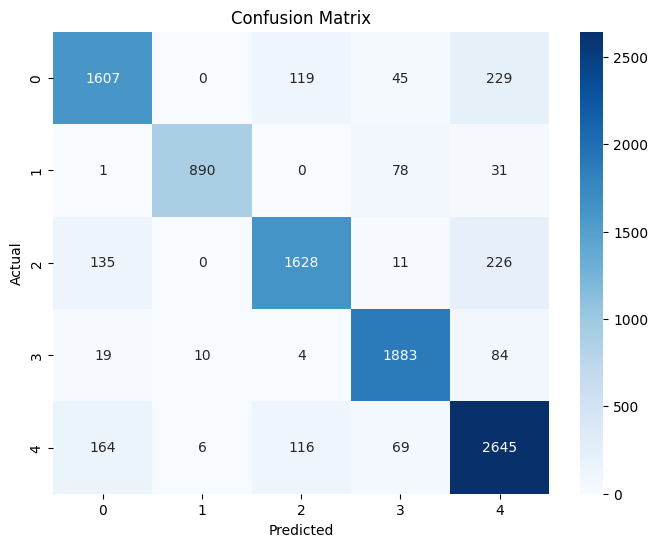

,Fold,Accuracy,Precision,Recall,F1-Score,Train Time (s),Validation Time (s)
0,1,0.863750,0.880192,0.865591,0.872071,NaN,NaN
1,2,0.874083,0.889930,0.872591,0.880227,NaN,NaN
2,3,0.863917,0.879868,0.864588,0.871306,NaN,NaN
3,4,0.868583,0.883311,0.867712,0.874538,NaN,NaN
4,5,0.867083,0.881587,0.865959,0.872805,NaN,NaN
5,Total,0.865300,0.882818,0.866133,0.873477,36.521802,1.346836


In [6]:
from DecisionTreeTrainer import DecisionTreeTrainer

#Number of estimators to 30
decisionTreeBaseModel = DecisionTreeTrainer(model_type="bagging", result_path="./decisiontree/ensemble-bagging", 
                                            max_depth=25, min_samples_split=50, max_features=1, estimators=30)
#Note that we removed train count and test count
metrics_df = decisionTreeBaseModel.train(dataset_train_path, dataset_label_train_path, dataset_test_path, dataset_label_test_path)
display(metrics_df)

#### **Trying with 20**

c:\Users\DELL\Desktop\Conestoga\AIML\FoundationsMachineLearningFramework\Lab\venvs\CSCN8010_classical_ml_311\Lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
c:\Users\DELL\Desktop\Conestoga\AIML\FoundationsMachineLearningFramework\Lab\venvs\CSCN8010_classical_ml_311\Lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
c:\Users\DELL\Desktop\Conestoga\AIML\FoundationsMachineLearningFramework\Lab\venvs\CSCN8010_classical_ml_311\Lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
c:\Users\DELL\Desktop\Conestoga\AIML\FoundationsMachineLearningFramework\Lab\venvs\CSCN8010_classical_ml_311\Lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarni

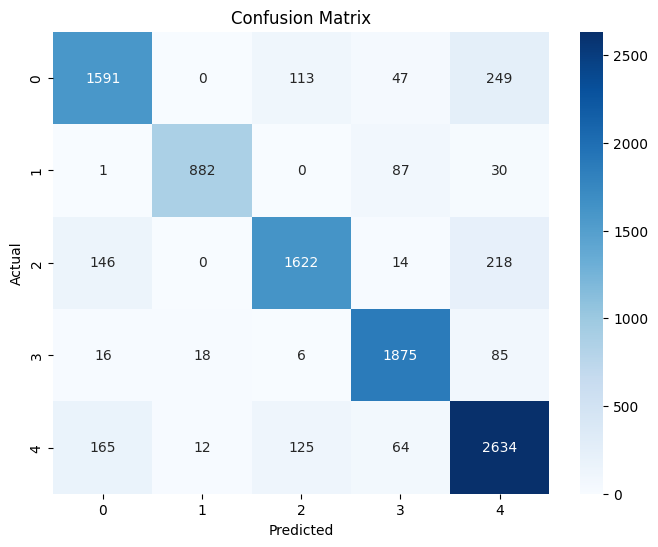

,Fold,Accuracy,Precision,Recall,F1-Score,Train Time (s),Validation Time (s)
0,1,0.863333,0.880416,0.864980,0.871802,NaN,NaN
1,2,0.872000,0.885880,0.871277,0.877765,NaN,NaN
2,3,0.863750,0.880085,0.864928,0.871705,NaN,NaN
3,4,0.864917,0.880184,0.864636,0.871482,NaN,NaN
4,5,0.864417,0.879236,0.863627,0.870423,NaN,NaN
5,Total,0.860400,0.876574,0.860800,0.867736,25.153277,0.909436


In [7]:
from DecisionTreeTrainer import DecisionTreeTrainer

#Number of estimators to 20
decisionTreeBaseModel = DecisionTreeTrainer(model_type="bagging", result_path="./decisiontree/ensemble-bagging", 
                                            max_depth=25, min_samples_split=50, max_features=1, estimators=20)
#Note that we removed train count and test count
metrics_df = decisionTreeBaseModel.train(dataset_train_path, dataset_label_train_path, dataset_test_path, dataset_label_test_path)
display(metrics_df)

##### **Trying with 15**

c:\Users\DELL\Desktop\Conestoga\AIML\FoundationsMachineLearningFramework\Lab\venvs\CSCN8010_classical_ml_311\Lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
c:\Users\DELL\Desktop\Conestoga\AIML\FoundationsMachineLearningFramework\Lab\venvs\CSCN8010_classical_ml_311\Lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
c:\Users\DELL\Desktop\Conestoga\AIML\FoundationsMachineLearningFramework\Lab\venvs\CSCN8010_classical_ml_311\Lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
c:\Users\DELL\Desktop\Conestoga\AIML\FoundationsMachineLearningFramework\Lab\venvs\CSCN8010_classical_ml_311\Lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarni

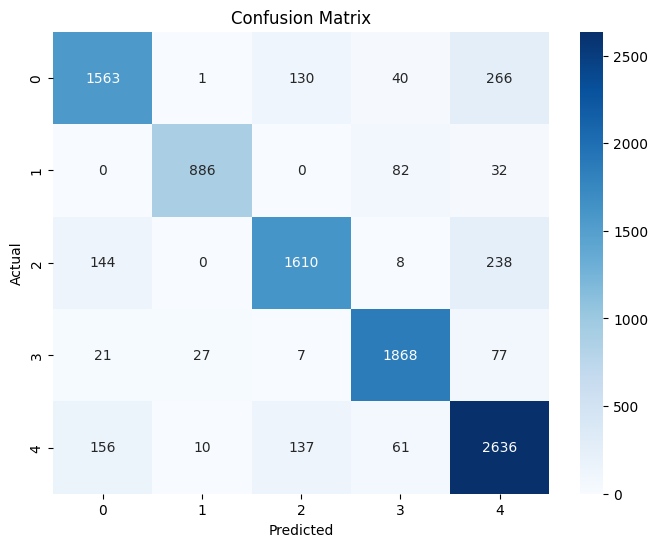

,Fold,Accuracy,Precision,Recall,F1-Score,Train Time (s),Validation Time (s)
0,1,0.859833,0.876758,0.862219,0.868714,NaN,NaN
1,2,0.865333,0.878995,0.864547,0.871085,NaN,NaN
2,3,0.860250,0.874604,0.861112,0.867237,NaN,NaN
3,4,0.863917,0.878604,0.862641,0.869478,NaN,NaN
4,5,0.861000,0.874542,0.860174,0.866514,NaN,NaN
5,Total,0.856300,0.872324,0.857033,0.863792,18.961133,0.622188


In [8]:
from DecisionTreeTrainer import DecisionTreeTrainer

#Number of estimators to 15
decisionTreeBaseModel = DecisionTreeTrainer(model_type="bagging", result_path="./decisiontree/ensemble-bagging", 
                                            max_depth=25, min_samples_split=50, max_features=1, estimators=15)
#Note that we removed train count and test count
metrics_df = decisionTreeBaseModel.train(dataset_train_path, dataset_label_train_path, dataset_test_path, dataset_label_test_path)
display(metrics_df)

- After trying multiple estimators an optimum value will be 20 estimators. 
- With 20 we achieve a gain of 10% ie from ~75% in simple model to ~86% with ensemble bagging and 20 estimators.

#### **Ensemble - Boosting**

- We will use the optimum numbers we arrived at from the previous iterations for boosting method to get started.

c:\Users\DELL\Desktop\Conestoga\AIML\FoundationsMachineLearningFramework\Lab\venvs\CSCN8010_classical_ml_311\Lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
c:\Users\DELL\Desktop\Conestoga\AIML\FoundationsMachineLearningFramework\Lab\venvs\CSCN8010_classical_ml_311\Lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
c:\Users\DELL\Desktop\Conestoga\AIML\FoundationsMachineLearningFramework\Lab\venvs\CSCN8010_classical_ml_311\Lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
c:\Users\DELL\Desktop\Conestoga\AIML\FoundationsMachineLearningFramework\Lab\venvs\CSCN8010_classical_ml_311\Lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarni

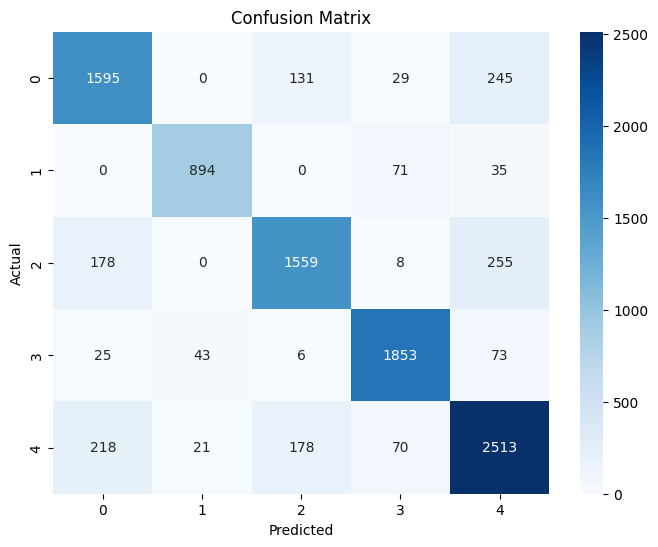

,Fold,Accuracy,Precision,Recall,F1-Score,Train Time (s),Validation Time (s)
0,1,0.840083,0.854748,0.843301,0.848471,NaN,NaN
1,2,0.845333,0.858351,0.849163,0.853231,NaN,NaN
2,3,0.842917,0.855005,0.846271,0.850135,NaN,NaN
3,4,0.843000,0.855438,0.845750,0.849964,NaN,NaN
4,5,0.833917,0.845413,0.836234,0.840444,NaN,NaN
5,Total,0.841400,0.854765,0.847033,0.850567,32.447685,0.451083


In [9]:
from DecisionTreeTrainer import DecisionTreeTrainer

#Number of estimators to 20
decisionTreeBaseModel = DecisionTreeTrainer(model_type="boosting", result_path="./decisiontree/ensemble-boosting", max_depth=25, min_samples_split=50, max_features=1, estimators=20)
#Note that we removed train count and test count
metrics_df = decisionTreeBaseModel.train(dataset_train_path, dataset_label_train_path, dataset_test_path, dataset_label_test_path)
display(metrics_df)

- Again we can see similar improvements from simple decision tree model.
- A gain of ~10% 
- When compared with bagging method even though the accuracy is similar the training time is better for bagging method. Its almost 60% of what the boosting method needs. ie 18 seconds for bagging and 32 for boosting.

##### **Trying with default values for all decision tree parameters and letting the ensemble model use an optimum value on its own on bagging method**

c:\Users\DELL\Desktop\Conestoga\AIML\FoundationsMachineLearningFramework\Lab\venvs\CSCN8010_classical_ml_311\Lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
c:\Users\DELL\Desktop\Conestoga\AIML\FoundationsMachineLearningFramework\Lab\venvs\CSCN8010_classical_ml_311\Lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
c:\Users\DELL\Desktop\Conestoga\AIML\FoundationsMachineLearningFramework\Lab\venvs\CSCN8010_classical_ml_311\Lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
c:\Users\DELL\Desktop\Conestoga\AIML\FoundationsMachineLearningFramework\Lab\venvs\CSCN8010_classical_ml_311\Lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarni

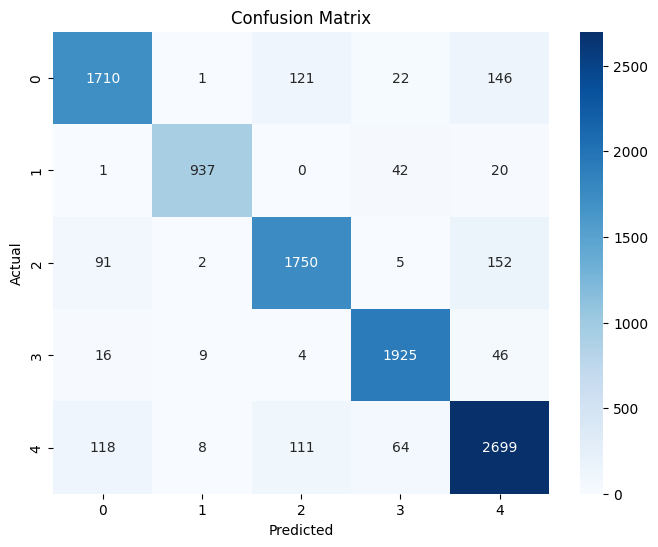

,Fold,Accuracy,Precision,Recall,F1-Score,Train Time (s),Validation Time (s)
0,1,0.898917,0.908390,0.900854,0.904365,NaN,NaN
1,2,0.908417,0.915766,0.910162,0.912824,NaN,NaN
2,3,0.899250,0.906977,0.901921,0.904307,NaN,NaN
3,4,0.901333,0.909070,0.902278,0.905433,NaN,NaN
4,5,0.903917,0.910501,0.905354,0.907772,NaN,NaN
5,Total,0.902100,0.912014,0.905833,0.908725,7305.551802,1.951933


In [3]:
from DecisionTreeTrainer import DecisionTreeTrainer

#Number of estimators to 100
decisionTreeBaseModel = DecisionTreeTrainer(model_type="bagging", result_path="./decisiontree/ensemble-bagging")
#Note that we removed train count and test count
metrics_df = decisionTreeBaseModel.train(dataset_train_path, dataset_label_train_path, dataset_test_path, dataset_label_test_path)
display(metrics_df)

> We can see that the ensemble method gives a good improvement of 6% in accuracy. But it took ~150 minutes to achieve this. 

> This points to the fact how important the hyperparameters are while training. The tradeoff is between time and accuracy.